In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

# About the Data 
Input variables (based on physicochemical tests):
* 1 - fixed acidity
* 2 - volatile acidity
* 3 - citric acid
* 4 - residual sugar
* 5 - chlorides
* 6 - free sulfur dioxide
* 7 - total sulfur dioxide
* 8 - density
* 9 - pH
* 10 - sulphates
* 11 - alcohol
* Output variable (based on sensory data):
* 12 - quality (score between 0 and 10)

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df_rows , df_cols = df.shape
print(df_rows)
print(df_cols)

1599
12


In [6]:
df2 = df.loc[:, 'fixed_acidity':'alcohol']

In [7]:
df2.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


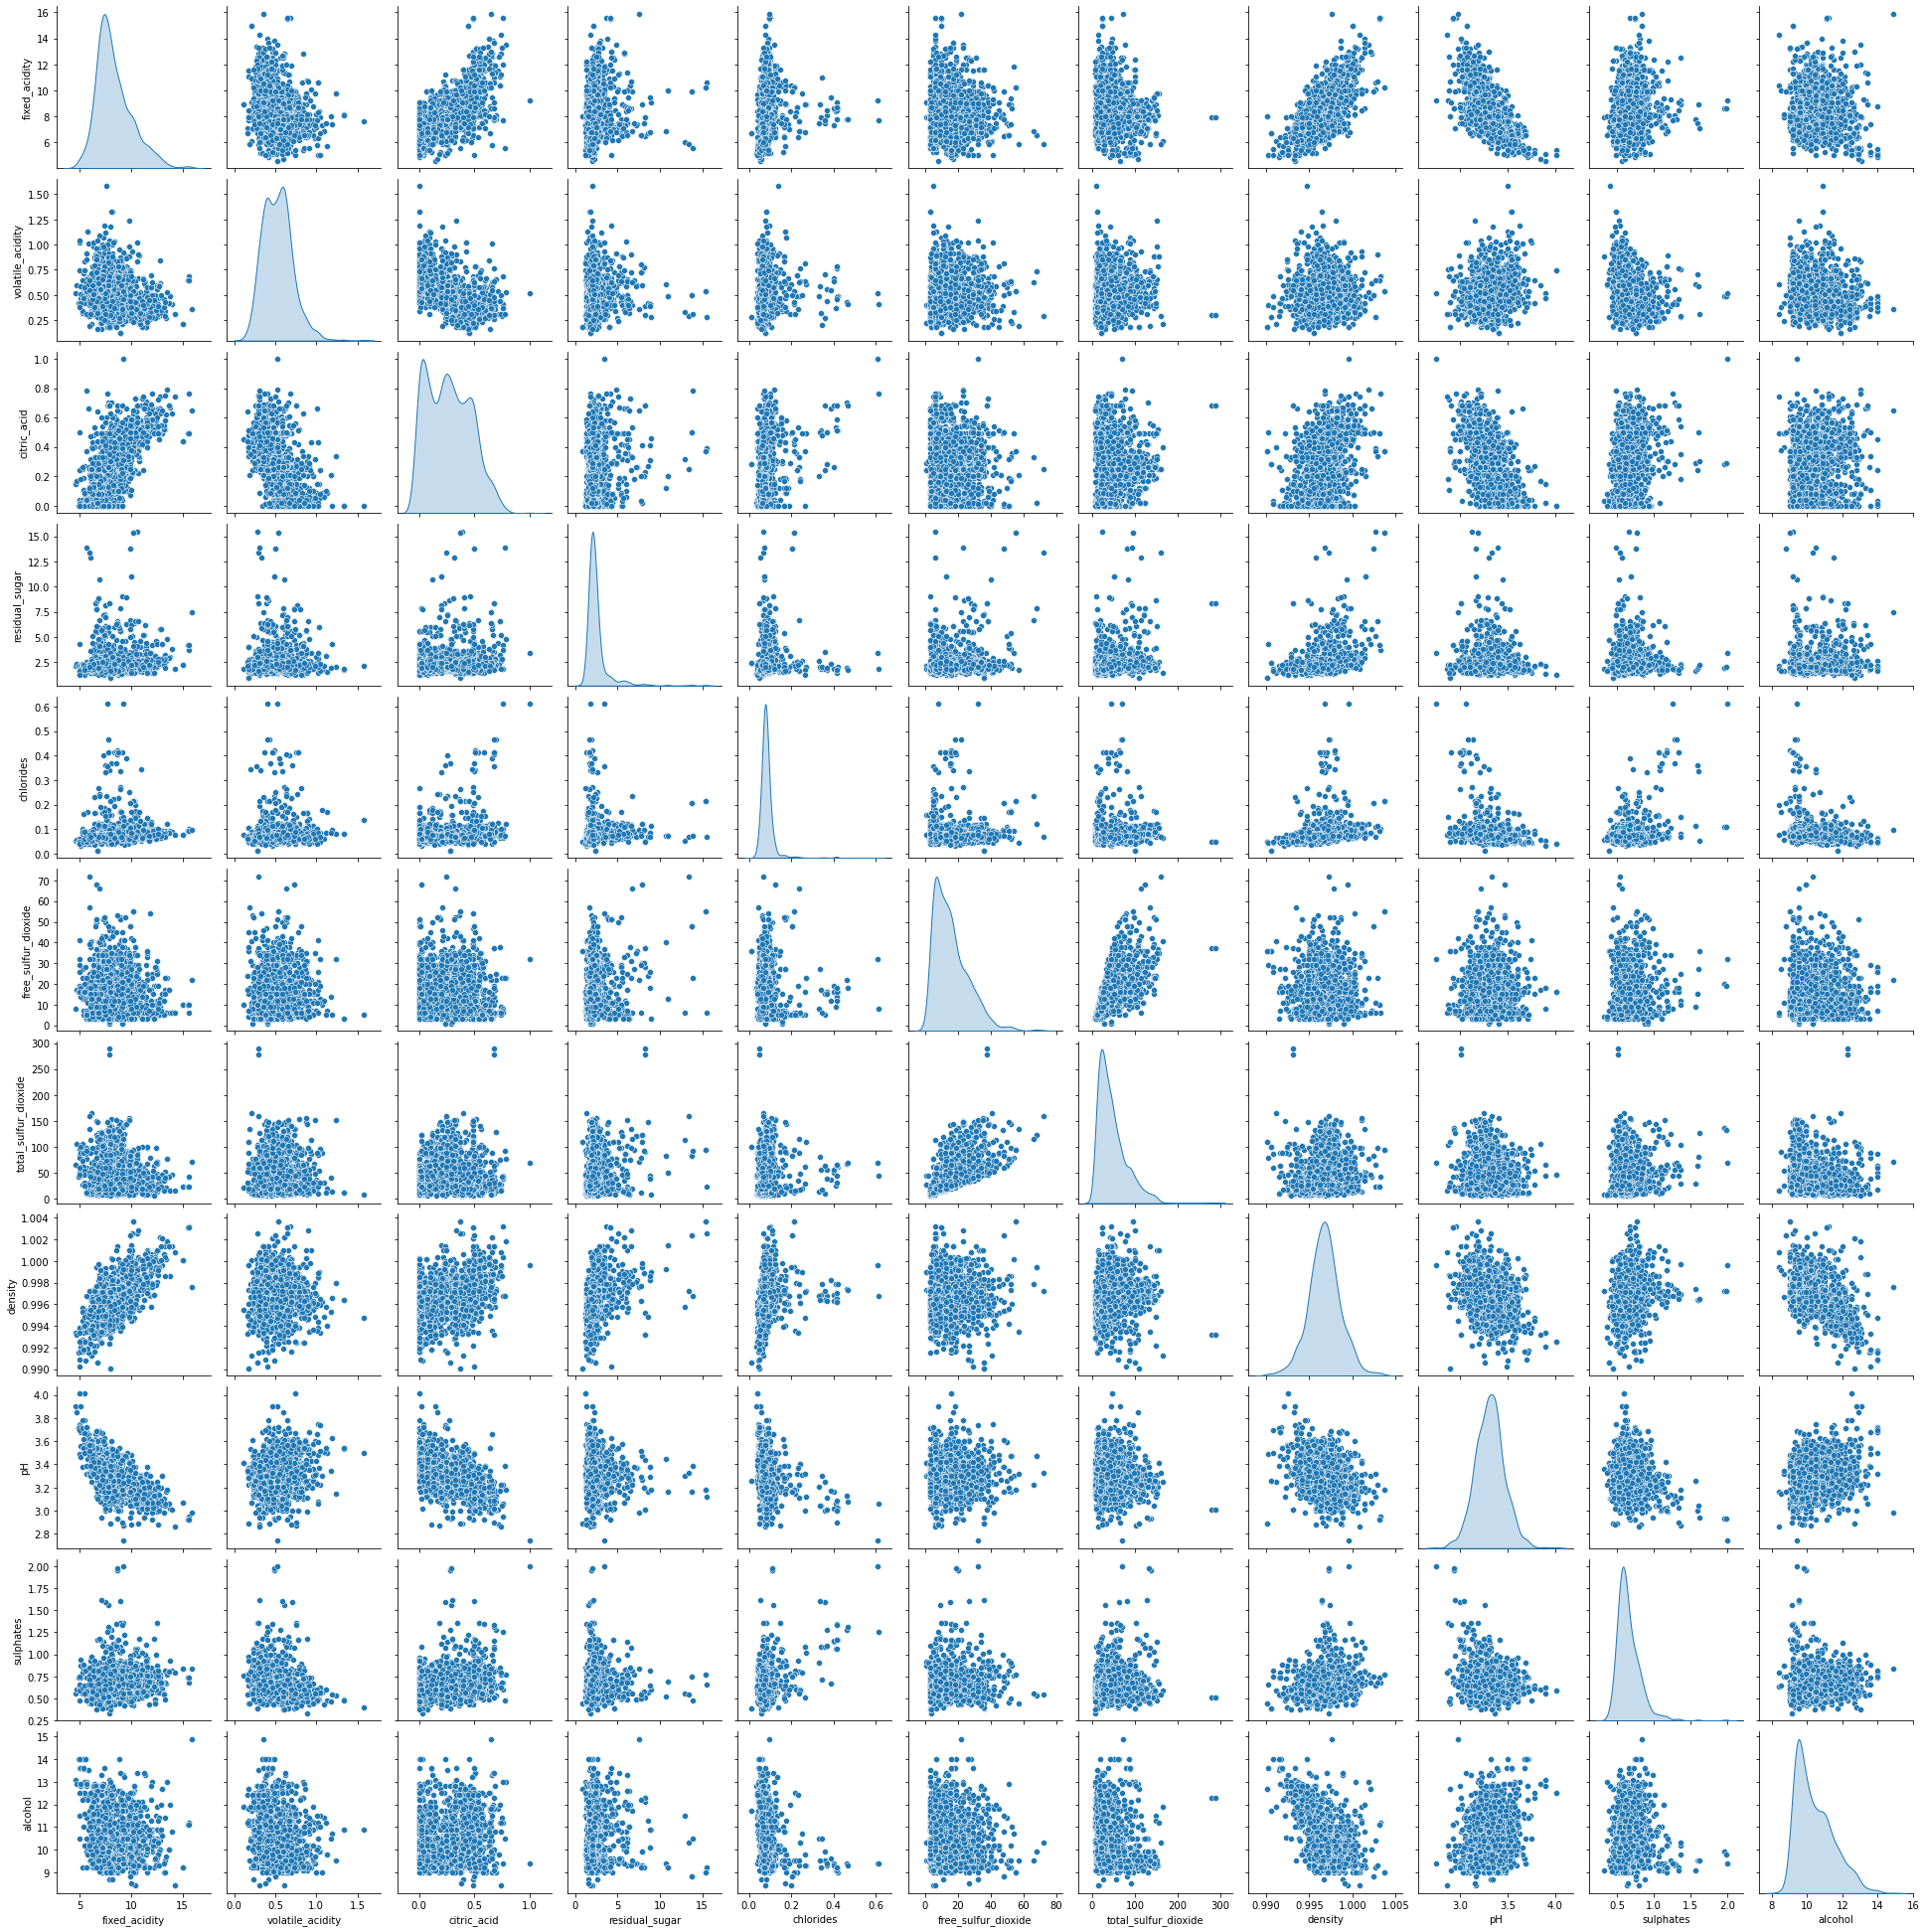

In [8]:
import seaborn as sns
sns.pairplot(df2,diag_kind='kde')

In [9]:
df_unscaled=df2
df_scaled = df2.apply(zscore)


# Without Scaling of Data 

In [45]:
df_unscaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [12]:
cluster_error=[]
for num_cluster in range(1,15):
    k_means=KMeans(n_clusters=num_cluster,n_init=10)
    k_means.fit(df_unscaled)
    centroid=k_means.cluster_centers_
    cluster_error.append(k_means.inertia_)
cluster_df=pd.DataFrame({'num_cluster':range(1,15),'errors':cluster_error})

In [13]:
cluster_df

,num_cluster,errors
0,1,1.914080e+06
1,2,6.919099e+05
2,3,3.953103e+05
3,4,2.831613e+05
4,5,2.211577e+05
5,6,1.773383e+05
6,7,1.498967e+05
7,8,1.320825e+05
8,9,1.165656e+05
9,10,1.016762e+05


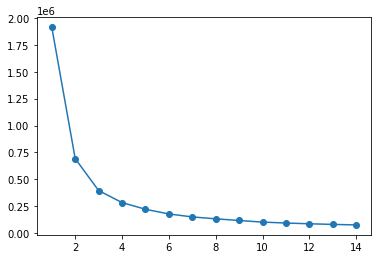

In [15]:
plt.plot(cluster_df['num_cluster'],cluster_df['errors'],marker='o')
plt.show()

In [16]:
k_means=KMeans(n_clusters=3,n_init=10)
k_means.fit(df_unscaled)

KMeans(n_clusters=3)

In [22]:
cluster_df=pd.DataFrame(k_means.cluster_centers_,columns=df_unscaled.columns)
cluster_df.index.name='Label'

In [23]:
cluster_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
Label,,,,,,,,,,,
0,8.477006,0.519240,0.270204,2.370359,0.084508,9.162874,22.851497,0.996621,3.310371,0.648407,10.591337
1,7.887552,0.572365,0.275643,3.232365,0.088398,26.151452,108.506224,0.996935,3.289627,0.652033,10.008921
2,8.267495,0.520994,0.270057,2.488145,0.091761,21.855641,55.585086,0.996861,3.322199,0.676520,10.344997


In [30]:
df_label=pd.DataFrame(k_means.labels_,columns=['Labels'])

In [27]:
df_unscaled['Label']=k_means.labels_

In [39]:
df_unscaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# With Scaling 

In [41]:
error=[]
for num_cluster in range(1,15):
    k_means=KMeans(n_clusters=num_cluster,n_init=10)
    k_means.fit(df_scaled)
    centroid=k_means.cluster_centers_
    error.append(k_means.inertia_)

In [43]:
clustr_df=pd.DataFrame({'num_cluster':range(1,15),'cluster_error':error})
clustr_df

,num_cluster,cluster_error
0,1,17589.000000
1,2,14330.144113
2,3,12629.974592
3,4,11294.210161
4,5,10155.374026
5,6,9362.658466
6,7,8645.253228
7,8,8302.076475
8,9,7967.215036
9,10,7671.870362


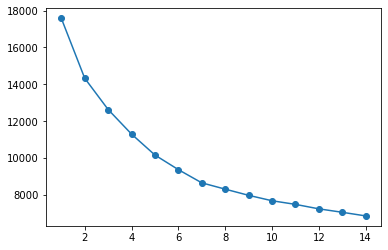

In [44]:
plt.plot(clustr_df['num_cluster'],clustr_df['cluster_error'],marker='o')
plt.show()

In [46]:
k_means=KMeans(n_clusters=7,n_init=10)
k_means.fit(df_scaled)

KMeans(n_clusters=7)

In [47]:
centroid=pd.DataFrame(k_means.cluster_centers_,columns=df_scaled.columns)
centroid

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.085633,-0.034652,0.414856,4.961768,0.296388,1.750191,1.695832,1.225001,-0.325460,-0.023789,-0.363913
1,-0.103036,0.054116,0.053545,-0.011648,-0.032946,0.994389,1.232270,0.223749,-0.107787,-0.188135,-0.572635
2,0.095416,0.002200,1.181553,-0.389872,5.784760,-0.049516,0.510330,0.180072,-1.735792,3.663412,-0.869731
3,0.048940,-1.026034,0.704410,-0.185668,-0.283227,-0.266866,-0.505776,-0.670357,-0.124829,0.422357,0.990986
4,-0.410436,0.636225,-0.782113,-0.205904,-0.036537,-0.486574,-0.412245,0.026430,0.319369,-0.397637,-0.517490
5,-1.113962,0.440472,-0.951516,-0.241484,-0.420489,0.296861,-0.153124,-1.342956,1.221150,-0.137223,1.200982
6,1.652696,-0.605382,1.238019,0.152772,0.031313,-0.529827,-0.471274,1.090360,-0.998835,0.298003,0.027713


In [48]:
df_scaled['Label']=k_means.labels_

In [50]:
df_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Label
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,4
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,4
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,4
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,4
